In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models, backend, layers, optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, SeparableConv2D 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend, models, layers, optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing import image # Used to view data augmented images
from tensorflow.keras.applications import Xception # Importing the xception model for transfer learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
import numpy as np
import pandas as pd
from google.colab import files
from google.colab import drive
from IPython.display import display 
from PIL import Image
import os, shutil # Library for navigating files
np.random.seed(18)

Using TensorFlow backend.


In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_dir = '/content/gdrive/My Drive/KaggleBirds/180'

In [0]:
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

In [0]:
train_ALBATROSS_dir = os.path.join(train_dir, 'ALBATROSS')
train_ALEXANDRINEPARAKEET_dir = os.path.join(train_dir, 'ALEXANDRINE PARAKEET')
train_AMERICANAVOCET_dir = os.path.join(train_dir, 'AMERICAN AVOCET')
train_AMERICANBITTERN_dir = os.path.join(train_dir, 'AMERICAN BITTERN')
train_AMERICANCOOT_dir = os.path.join(train_dir, 'AMERICAN COOT')
train_AMERICANGOLDFINCH_dir = os.path.join(train_dir, 'AMERICAN GOLDFINCH')
train_AMERICANKESTREL_dir = os.path.join(train_dir, 'AMERICAN KESTREL')
train_AMERICANPIPIT_dir = os.path.join(train_dir, 'AMERICAN PIPIT')
train_AMERICANREDSTART_dir = os.path.join(train_dir, 'AMERICAN REDSTART')
train_ANHINGA_dir = os.path.join(train_dir, 'ANHINGA')
train_ANNASHUMMINGBIRD_dir = os.path.join(train_dir, 'ANNAS HUMMINGBIRD')
train_ANTBIRD_dir = os.path.join(train_dir, 'ANTBIRD')
train_ARARIPEMANAKIN_dir = os.path.join(train_dir, 'ARARIPE MANAKIN')
train_BALDEAGLE_dir = os.path.join(train_dir, 'BALD EAGLE')
train_BALTIMOREORIOLE_dir = os.path.join(train_dir, 'BALTIMORE ORIOLE')
train_BANANAQUIT_dir = os.path.join(train_dir, 'BANANAQUIT')
train_BARNOWL_dir = os.path.join(train_dir, 'BARN OWL')
train_BARNSWALLOW_dir = os.path.join(train_dir, 'BARN SWALLOW')
train_BARTAILEDGODWIT_dir = os.path.join(train_dir, 'BAR-TAILED GODWIT')
train_BAYBREASTEDWARBLER_dir = os.path.join(train_dir, 'BAY-BREASTED WARBLER')
train_BELTEDKINGFISHER_dir = os.path.join(train_dir, 'BELTED KINGFISHER')
train_BIRDOFPARADISE_dir = os.path.join(train_dir, 'BIRD OF PARADISE')
train_BLACKFRANCOLIN_dir = os.path.join(train_dir, 'BLACK FRANCOLIN')
train_BLACKSKIMMER_dir = os.path.join(train_dir, 'BLACK SKIMMER')
train_BLACKSWAN_dir = os.path.join(train_dir, 'BLACK SWAN')
train_BLACKTHROATEDWARBLER_dir = os.path.join(train_dir, 'BLACK THROATED WARBLER')
train_BLACKVULTURE_dir = os.path.join(train_dir, 'BLACK VULTURE')
train_BLACKBURNIAMWARBLER_dir = os.path.join(train_dir, 'BLACKBURNIAM WARBLER')
train_BLACKCAPPEDCHICKADEE_dir = os.path.join(train_dir, 'BLACK-CAPPED CHICKADEE')
train_BLACKNECKEDGREBE_dir = os.path.join(train_dir, 'BLACK-NECKED GREBE')
train_BLUEGROUSE_dir = os.path.join(train_dir, 'BLUE GROUSE')
train_BLUEHERON_dir = os.path.join(train_dir, 'BLUE HERON')
train_BOBOLINK_dir = os.path.join(train_dir, 'BOBOLINK')
train_BROWNTHRASHER_dir = os.path.join(train_dir, 'BROWN THRASHER')
train_CACTUSWREN_dir = os.path.join(train_dir, 'CACTUS WREN')
train_CALIFORNIACONDOR_dir = os.path.join(train_dir, 'CALIFORNIA CONDOR')
train_CALIFORNIAGULL_dir = os.path.join(train_dir, 'CALIFORNIA GULL')
train_CALIFORNIAQUAIL_dir = os.path.join(train_dir, 'CALIFORNIA QUAIL')
train_CANARY_dir = os.path.join(train_dir, 'CANARY')
train_CAPEMAYWARBLER_dir = os.path.join(train_dir, 'CAPE MAY WARBLER')
train_CARMINEBEEEATER_dir = os.path.join(train_dir, 'CARMINE BEE-EATER')
train_CASPIANTERN_dir = os.path.join(train_dir, 'CASPIAN TERN')
train_CASSOWARY_dir = os.path.join(train_dir, 'CASSOWARY')
train_CHARADECOLLAR_dir = os.path.join(train_dir, 'CHARA DE COLLAR')
train_CHIPPINGSPARROW_dir = os.path.join(train_dir, 'CHIPPING SPARROW')
train_CINNAMONTEAL_dir = os.path.join(train_dir, 'CINNAMON TEAL')
train_COCKOFTHEROCK_dir = os.path.join(train_dir, 'COCK OF THE  ROCK')
train_COCKATOO_dir = os.path.join(train_dir, 'COCKATOO')
train_COMMONGRACKLE_dir = os.path.join(train_dir, 'COMMON GRACKLE')
train_COMMONHOUSEMARTIN_dir = os.path.join(train_dir, 'COMMON HOUSE MARTIN')
train_COMMONLOON_dir = os.path.join(train_dir, 'COMMON LOON')
train_COMMONPOORWILL_dir = os.path.join(train_dir, 'COMMON POORWILL')
train_COMMONSTARLING_dir = os.path.join(train_dir, 'COMMON STARLING')
train_COUCHSKINGBIRD_dir = os.path.join(train_dir, 'COUCHS KINGBIRD')
train_CRESTEDAUKLETN_dir = os.path.join(train_dir, 'CRESTED AUKLET')
train_CRESTEDCARACARA_dir = os.path.join(train_dir, 'CRESTED CARACARA')
train_CROW_dir = os.path.join(train_dir, 'CROW')
train_CROWNEDPIGEON_dir = os.path.join(train_dir, 'CROWNED PIGEON')
train_CUBANTODY_dir = os.path.join(train_dir, 'CUBAN TODY')
train_CURLCRESTEDARACURI_dir = os.path.join(train_dir, 'CURL CRESTED ARACURI')
train_DARKEYEDJUNCO_dir = os.path.join(train_dir, 'DARK EYED JUNCO')
train_DARNAUDSBARBET_dir = os.path.join(train_dir, 'D-ARNAUDS BARBET')
train_DOVEKIE_dir = os.path.join(train_dir, 'DOVEKIE')
train_DOWNYWOODPECKER_dir = os.path.join(train_dir, 'DOWNY WOODPECKER')
train_EASTERNBLUEBIRD_dir = os.path.join(train_dir, 'EASTERN BLUEBIRD')
train_EASTERNMEADOWLARK_dir = os.path.join(train_dir, 'EASTERN MEADOWLARK')
train_EASTERNROSELLA_dir = os.path.join(train_dir, 'EASTERN ROSELLA')
train_EASTERNTOWEE_dir = os.path.join(train_dir, 'EASTERN TOWEE')
train_ELEGANTTROGON_dir = os.path.join(train_dir, 'ELEGANT TROGON')
train_ELLIOTSPHEASANT_dir = os.path.join(train_dir, 'ELLIOTS  PHEASANT')
train_EMPERORPENGUIN_dir = os.path.join(train_dir, 'EMPEROR PENGUIN')
train_EMU_dir = os.path.join(train_dir, 'EMU')
train_EURASIANMAGPIE_dir = os.path.join(train_dir, 'EURASIAN MAGPIE')
train_EVENINGGROSBEAK_dir = os.path.join(train_dir, 'EVENING GROSBEAK')
train_FLAMETANAGER_dir = os.path.join(train_dir, 'FLAME TANAGER')
train_FLAMINGO_dir = os.path.join(train_dir, 'FLAMINGO')
train_FRIGATE_dir = os.path.join(train_dir, 'FRIGATE')
train_GILAWOODPECKER_dir = os.path.join(train_dir, 'GILA WOODPECKER')
train_GLOSSYIBIS_dir = os.path.join(train_dir, 'GLOSSY IBIS')
train_GOLDWINGWARBLER_dir = os.path.join(train_dir, 'GOLD WING WARBLER')
train_GOLDENCHLOROPHONIA_dir = os.path.join(train_dir, 'GOLDEN CHLOROPHONIA')
train_GOLDENEAGLE_dir = os.path.join(train_dir, 'GOLDEN EAGLE')
train_GOLDENPHEASANT_dir = os.path.join(train_dir, 'GOLDEN PHEASANT')
train_GOULDIANFINCH_dir = os.path.join(train_dir, 'GOULDIAN FINCH')
train_GOLDWINGWARBLER_dir = os.path.join(train_dir, 'GOLD WING WARBLER')
train_GRAYCATBIRD_dir = os.path.join(train_dir, 'GRAY CATBIRD')
train_GRAYPARTRIDGE_dir = os.path.join(train_dir, 'GRAY PARTRIDGE')
train_GREENJAY_dir = os.path.join(train_dir, 'GREEN JAY')
train_GREYPLOVER_dir = os.path.join(train_dir, 'GREY PLOVER')
train_GUINEAFOWL_dir = os.path.join(train_dir, 'GUINEAFOWL')
train_HAWAIIANGOOSE_dir = os.path.join(train_dir, 'HAWAIIAN GOOSE')
train_HOODEDMERGANSER_dir = os.path.join(train_dir, 'HOODED MERGANSER')
train_HOOPOES_dir = os.path.join(train_dir, 'HOOPOES')
train_HORNBILL_dir = os.path.join(train_dir, 'HORNBILL')
train_HOUSEFINCH_dir = os.path.join(train_dir, 'HOUSE FINCH')
train_HOUSESPARROW_dir = os.path.join(train_dir, 'HOUSE SPARROW')
train_HYACINTHMACAW_dir = os.path.join(train_dir, 'HYACINTH MACAW')
train_INCATERN_dir = os.path.join(train_dir, 'INCA TERN')
train_INDIGOBUNTING_dir = os.path.join(train_dir, 'INDIGO BUNTING')
train_JABIRU_dir = os.path.join(train_dir, 'JABIRU')
train_JAVANMAGPIE_dir = os.path.join(train_dir, 'JAVAN MAGPIE')
train_KILLDEAR_dir = os.path.join(train_dir, 'KILLDEAR')
train_KINGVULTURE_dir = os.path.join(train_dir, 'KING VULTURE')
train_LARKBUNTING_dir = os.path.join(train_dir, 'LARK BUNTING')
train_LILACROLLER_dir = os.path.join(train_dir, 'LILAC ROLLER')
train_LONGEAREDOWL_dir = os.path.join(train_dir, 'LONG-EARED OWL')
train_MALEO_dir = os.path.join(train_dir, 'MALEO')
train_MALLARDDUCK_dir = os.path.join(train_dir, 'MALLARD DUCK')
train_MANDRINDUCK_dir = os.path.join(train_dir, 'MANDRIN DUCK')
train_MARABOUSTORK_dir = os.path.join(train_dir, 'MARABOU STORK')
train_MASKEDBOOBY_dir = os.path.join(train_dir, 'MASKED BOOBY')
train_MIKADOPHEASANT_dir = os.path.join(train_dir, 'MIKADO  PHEASANT')
train_MOURNINGDOVE_dir = os.path.join(train_dir, 'MOURNING DOVE')
train_MYNA_dir = os.path.join(train_dir, 'MYNA')
train_NICOBARPIGEON_dir = os.path.join(train_dir, 'NICOBAR PIGEON')
train_NORTHERNCARDINAL_dir = os.path.join(train_dir, 'NORTHERN CARDINAL')
train_NORTHERNFLICKER_dir = os.path.join(train_dir, 'NORTHERN FLICKER')
train_NORTHERNGANNET_dir = os.path.join(train_dir, 'NORTHERN GANNET')
train_NORTHERNGOSHAWK_dir = os.path.join(train_dir, 'NORTHERN GOSHAWK')
train_NORTHERNJACANA_dir = os.path.join(train_dir, 'NORTHERN JACANA')
train_NORTHERNMOCKINGBIRD_dir = os.path.join(train_dir, 'NORTHERN MOCKINGBIRD')
train_NORTHERNREDBISHOP_dir = os.path.join(train_dir, 'NORTHERN RED BISHOP')
train_OCELLATEDTURKEY_dir = os.path.join(train_dir, 'OCELLATED TURKEY')
train_OSPREY_dir = os.path.join(train_dir, 'OSPREY')
train_OSTRICH_dir = os.path.join(train_dir, 'OSTRICH')
train_PAINTEDBUNTIG_dir = os.path.join(train_dir, 'PAINTED BUNTIG')
train_PARADISETANAGER_dir = os.path.join(train_dir, 'PARADISE TANAGER')
train_PARUSMAJOR_dir = os.path.join(train_dir, 'PARUS MAJOR')
train_PEACOCK_dir = os.path.join(train_dir, 'PEACOCK')
train_PELICAN_dir = os.path.join(train_dir, 'PELICAN')
train_PEREGRINEFALCON_dir = os.path.join(train_dir, 'PEREGRINE FALCON')
train_PINKROBIN_dir = os.path.join(train_dir, 'PINK ROBIN')
train_PUFFIN_dir = os.path.join(train_dir, 'PUFFIN')
train_PURPLEFINCH_dir = os.path.join(train_dir, 'PURPLE FINCH')
train_PURPLEGALLINULE_dir = os.path.join(train_dir, 'PURPLE GALLINULE')
train_PURPLEMARTIN_dir = os.path.join(train_dir, 'PURPLE MARTIN')
train_PURPLESWAMPHEN_dir = os.path.join(train_dir, 'PURPLE SWAMPHEN')
train_QUETZAL_dir = os.path.join(train_dir, 'QUETZAL')
train_RAINBOWLORIKEET_dir = os.path.join(train_dir, 'RAINBOW LORIKEET')
train_REDFACEDCORMORANT_dir = os.path.join(train_dir, 'RED FACED CORMORANT')
train_REDHEADEDWOODPECKER_dir = os.path.join(train_dir, 'RED HEADED WOODPECKER')
train_REDTHROATEDBEEEATER_dir = os.path.join(train_dir, 'RED THROATED BEE EATER')
train_REDWINGEDBLACKBIRD_dir = os.path.join(train_dir, 'RED WINGED BLACKBIRD')
train_REDWISKEREDBULBUL_dir = os.path.join(train_dir, 'RED WISKERED BULBUL')
train_RINGNECKEDPHEASANT_dir = os.path.join(train_dir, 'RING-NECKED PHEASANT')
train_ROADRUNNER_dir = os.path.join(train_dir, 'ROADRUNNER')
train_ROBIN_dir = os.path.join(train_dir, 'ROBIN')
train_ROCKDOVE_dir = os.path.join(train_dir, 'ROCK DOVE')
train_ROSYFACEDLOVEBIRD_dir = os.path.join(train_dir, 'ROSY FACED LOVEBIRD')
train_ROUGHLEGBUZZARD_dir = os.path.join(train_dir, 'ROUGH LEG BUZZARD')
train_RUBYTHROATEDHUMMINGBIRD_dir = os.path.join(train_dir, 'RUBY THROATED HUMMINGBIRD')
train_RUFOUSKINGFISHER_dir = os.path.join(train_dir, 'RUFOUS KINGFISHER')
train_RUFUOSMOTMOT_dir = os.path.join(train_dir, 'RUFUOS MOTMOT')
train_SANDMARTIN_dir = os.path.join(train_dir, 'SAND MARTIN')
train_SCARLETIBIS_dir = os.path.join(train_dir, 'SCARLET IBIS')
train_SCARLETMACAW_dir = os.path.join(train_dir, 'SCARLET MACAW')
train_SHOEBILL_dir = os.path.join(train_dir, 'SHOEBILL')
train_SNOWYEGRET_dir = os.path.join(train_dir, 'SNOWY EGRET')
train_SORA_dir = os.path.join(train_dir, 'SORA')
train_SPLENDIDWREN_dir = os.path.join(train_dir, 'SPLENDID WREN')
train_SPOONBILL_dir = os.path.join(train_dir, 'SPOONBILL')
train_STORKBILLEDKINGFISHER_dir = os.path.join(train_dir, 'STORK BILLED KINGFISHER')
train_STRAWBERRYFINCH_dir = os.path.join(train_dir, 'STRAWBERRY FINCH')
train_TAIWANMAGPIE_dir = os.path.join(train_dir, 'TAIWAN MAGPIE')
train_TEALDUCK_dir = os.path.join(train_dir, 'TEAL DUCK')
train_TITMOUSE_dir = os.path.join(train_dir, 'TIT MOUSE')
train_TOUCHAN_dir = os.path.join(train_dir, 'TOUCHAN')
train_TRUMPTERSWAN_dir = os.path.join(train_dir, 'TRUMPTER SWAN')
train_TURKEYVULTURE_dir = os.path.join(train_dir, 'TURKEY VULTURE')
train_TURQUOISEMOTMOT_dir = os.path.join(train_dir, 'TURQUOISE MOTMOT')
train_VARIEDTHRUSH_dir = os.path.join(train_dir, 'VARIED THRUSH')
train_VENEZUELIANTROUPIAL_dir = os.path.join(train_dir, 'VENEZUELIAN TROUPIAL')
train_VERMILIONFLYCATHER_dir = os.path.join(train_dir, 'VERMILION FLYCATHER')
train_VIOLETGREENSWALLOW_dir = os.path.join(train_dir, 'VIOLET GREEN SWALLOW')
train_WESTERNMEADOWLARK_dir = os.path.join(train_dir, 'WESTERN MEADOWLARK')
train_WHITECHEEKEDTURACO_dir = os.path.join(train_dir, 'WHITE CHEEKED TURACO')
train_WHITETAILEDTROPIC_dir = os.path.join(train_dir, 'WHITE TAILED TROPIC')
train_WILDTURKEY_dir = os.path.join(train_dir, 'WILD TURKEY')
train_WILSONSBIRDOFPARADISE_dir = os.path.join(train_dir, 'WILSONS BIRD OF PARADISE')
train_WOODDUCK_dir = os.path.join(train_dir, 'WOOD DUCK')
train_YELLOWHEADEDBLACKBIRD_dir = os.path.join(train_dir, 'YELLOW HEADED BLACKBIRD')

In [0]:
validation_ALBATROSS_dir = os.path.join(validation_dir, 'ALBATROSS')
validation_ALEXANDRINEPARAKEET_dir = os.path.join(validation_dir, 'ALEXANDRINE PARAKEET')
validation_AMERICANAVOCET_dir = os.path.join(validation_dir, 'AMERICAN AVOCET')
validation_AMERICANBITTERN_dir = os.path.join(validation_dir, 'AMERICAN BITTERN')
validation_AMERICANCOOT_dir = os.path.join(validation_dir, 'AMERICAN COOT')
validation_AMERICANGOLDFINCH_dir = os.path.join(validation_dir, 'AMERICAN GOLDFINCH')
validation_AMERICANKESTREL_dir = os.path.join(validation_dir, 'AMERICAN KESTREL')
validation_AMERICANPIPIT_dir = os.path.join(validation_dir, 'AMERICAN PIPIT')
validation_AMERICANREDSTART_dir = os.path.join(validation_dir, 'AMERICAN REDSTART')
validation_ANHINGA_dir = os.path.join(validation_dir, 'ANHINGA')
validation_ANNASHUMMINGBIRD_dir = os.path.join(validation_dir, 'ANNAS HUMMINGBIRD')
validation_ANTBIRD_dir = os.path.join(validation_dir, 'ANTBIRD')
validation_ARARIPEMANAKIN_dir = os.path.join(validation_dir, 'ARARIPE MANAKIN')
validation_BALDEAGLE_dir = os.path.join(validation_dir, 'BALD EAGLE')
validation_BALTIMOREORIOLE_dir = os.path.join(validation_dir, 'BALTIMORE ORIOLE')
validation_BANANAQUIT_dir = os.path.join(validation_dir, 'BANANAQUIT')
validation_BARNOWL_dir = os.path.join(validation_dir, 'BARN OWL')
validation_BARNSWALLOW_dir = os.path.join(validation_dir, 'BARN SWALLOW')
validation_BARTAILEDGODWIT_dir = os.path.join(validation_dir, 'BAR-TAILED GODWIT')
validation_BAYBREASTEDWARBLER_dir = os.path.join(validation_dir, 'BAY-BREASTED WARBLER')
validation_BELTEDKINGFISHER_dir = os.path.join(validation_dir, 'BELTED KINGFISHER')
validation_BIRDOFPARADISE_dir = os.path.join(validation_dir, 'BIRD OF PARADISE')
validation_BLACKFRANCOLIN_dir = os.path.join(validation_dir, 'BLACK FRANCOLIN')
validation_BLACKSKIMMER_dir = os.path.join(validation_dir, 'BLACK SKIMMER')
validation_BLACKSWAN_dir = os.path.join(validation_dir, 'BLACK SWAN')
validation_BLACKTHROATEDWARBLER_dir = os.path.join(validation_dir, 'BLACK THROATED WARBLER')
validation_BLACKVULTURE_dir = os.path.join(validation_dir, 'BLACK VULTURE')
validation_BLACKBURNIAMWARBLER_dir = os.path.join(validation_dir, 'BLACKBURNIAM WARBLER')
validation_BLACKCAPPEDCHICKADEE_dir = os.path.join(validation_dir, 'BLACK-CAPPED CHICKADEE')
validation_BLACKNECKEDGREBE_dir = os.path.join(validation_dir, 'BLACK-NECKED GREBE')
validation_BLUEGROUSE_dir = os.path.join(validation_dir, 'BLUE GROUSE')
validation_BLUEHERON_dir = os.path.join(validation_dir, 'BLUE HERON')
validation_BOBOLINK_dir = os.path.join(validation_dir, 'BOBOLINK')
validation_BROWNTHRASHER_dir = os.path.join(validation_dir, 'BROWN THRASHER')
validation_CACTUSWREN_dir = os.path.join(validation_dir, 'CACTUS WREN')
validation_CALIFORNIACONDOR_dir = os.path.join(validation_dir, 'CALIFORNIA CONDOR')
validation_CALIFORNIAGULL_dir = os.path.join(validation_dir, 'CALIFORNIA GULL')
validation_CALIFORNIAQUAIL_dir = os.path.join(validation_dir, 'CALIFORNIA QUAIL')
validation_CANARY_dir = os.path.join(validation_dir, 'CANARY')
validation_CAPEMAYWARBLER_dir = os.path.join(validation_dir, 'CAPE MAY WARBLER')
validation_CARMINEBEEEATER_dir = os.path.join(validation_dir, 'CARMINE BEE-EATER')
validation_CASPIANTERN_dir = os.path.join(validation_dir, 'CASPIAN TERN')
validation_CASSOWARY_dir = os.path.join(validation_dir, 'CASSOWARY')
validation_CHARADECOLLAR_dir = os.path.join(validation_dir, 'CHARA DE COLLAR')
validation_CHIPPINGSPARROW_dir = os.path.join(validation_dir, 'CHIPPING SPARROW')
validation_CINNAMONTEAL_dir = os.path.join(validation_dir, 'CINNAMON TEAL')
validation_COCKOFTHEROCK_dir = os.path.join(validation_dir, 'COCK OF THE  ROCK')
validation_COCKATOO_dir = os.path.join(validation_dir, 'COCKATOO')
validation_COMMONGRACKLE_dir = os.path.join(validation_dir, 'COMMON GRACKLE')
validation_COMMONHOUSEMARTIN_dir = os.path.join(validation_dir, 'COMMON HOUSE MARTIN')
validation_COMMONLOON_dir = os.path.join(validation_dir, 'COMMON LOON')
validation_COMMONPOORWILL_dir = os.path.join(validation_dir, 'COMMON POORWILL')
validation_COMMONSTARLING_dir = os.path.join(validation_dir, 'COMMON STARLING')
validation_COUCHSKINGBIRD_dir = os.path.join(validation_dir, 'COUCHS KINGBIRD')
validation_CRESTEDAUKLETN_dir = os.path.join(validation_dir, 'CRESTED AUKLET')
validation_CRESTEDCARACARA_dir = os.path.join(validation_dir, 'CRESTED CARACARA')
validation_CROW_dir = os.path.join(validation_dir, 'CROW')
validation_CROWNEDPIGEON_dir = os.path.join(validation_dir, 'CROWNED PIGEON')
validation_CUBANTODY_dir = os.path.join(validation_dir, 'CUBAN TODY')
validation_CURLCRESTEDARACURI_dir = os.path.join(validation_dir, 'CURL CRESTED ARACURI')
validation_DARKEYEDJUNCO_dir = os.path.join(validation_dir, 'DARK EYED JUNCO')
validation_DARNAUDSBARBET_dir = os.path.join(validation_dir, 'D-ARNAUDS BARBET')
validation_DOVEKIE_dir = os.path.join(validation_dir, 'DOVEKIE')
validation_DOWNYWOODPECKER_dir = os.path.join(validation_dir, 'DOWNY WOODPECKER')
validation_EASTERNBLUEBIRD_dir = os.path.join(validation_dir, 'EASTERN BLUEBIRD')
validation_EASTERNMEADOWLARK_dir = os.path.join(validation_dir, 'EASTERN MEADOWLARK')
validation_EASTERNROSELLA_dir = os.path.join(validation_dir, 'EASTERN ROSELLA')
validation_EASTERNTOWEE_dir = os.path.join(validation_dir, 'EASTERN TOWEE')
validation_ELEGANTTROGON_dir = os.path.join(validation_dir, 'ELEGANT TROGON')
validation_ELLIOTSPHEASANT_dir = os.path.join(validation_dir, 'ELLIOTS  PHEASANT')
validation_EMPERORPENGUIN_dir = os.path.join(validation_dir, 'EMPEROR PENGUIN')
validation_EMU_dir = os.path.join(validation_dir, 'EMU')
validation_EURASIANMAGPIE_dir = os.path.join(validation_dir, 'EURASIAN MAGPIE')
validation_EVENINGGROSBEAK_dir = os.path.join(validation_dir, 'EVENING GROSBEAK')
validation_FLAMETANAGER_dir = os.path.join(validation_dir, 'FLAME TANAGER')
validation_FLAMINGO_dir = os.path.join(validation_dir, 'FLAMINGO')
validation_FRIGATE_dir = os.path.join(validation_dir, 'FRIGATE')
validation_GILAWOODPECKER_dir = os.path.join(validation_dir, 'GILA WOODPECKER')
validation_GLOSSYIBIS_dir = os.path.join(validation_dir, 'GLOSSY IBIS')
validation_GOLDWINGWARBLER_dir = os.path.join(validation_dir, 'GOLD WING WARBLER')
validation_GOLDENCHLOROPHONIA_dir = os.path.join(validation_dir, 'GOLDEN CHLOROPHONIA')
validation_GOLDENEAGLE_dir = os.path.join(validation_dir, 'GOLDEN EAGLE')
validation_GOLDENPHEASANT_dir = os.path.join(validation_dir, 'GOLDEN PHEASANT')
validation_GOULDIANFINCH_dir = os.path.join(validation_dir, 'GOULDIAN FINCH')
validation_GOLDWINGWARBLER_dir = os.path.join(validation_dir, 'GOLD WING WARBLER')
validation_GRAYCATBIRD_dir = os.path.join(validation_dir, 'GRAY CATBIRD')
validation_GRAYPARTRIDGE_dir = os.path.join(validation_dir, 'GRAY PARTRIDGE')
validation_GREENJAY_dir = os.path.join(validation_dir, 'GREEN JAY')
validation_GREYPLOVER_dir = os.path.join(validation_dir, 'GREY PLOVER')
validation_GUINEAFOWL_dir = os.path.join(validation_dir, 'GUINEAFOWL')
validation_HAWAIIANGOOSE_dir = os.path.join(validation_dir, 'HAWAIIAN GOOSE')
validation_HOODEDMERGANSER_dir = os.path.join(validation_dir, 'HOODED MERGANSER')
validation_HOOPOES_dir = os.path.join(validation_dir, 'HOOPOES')
validation_HORNBILL_dir = os.path.join(validation_dir, 'HORNBILL')
validation_HOUSEFINCH_dir = os.path.join(validation_dir, 'HOUSE FINCH')
validation_HOUSESPARROW_dir = os.path.join(validation_dir, 'HOUSE SPARROW')
validation_HYACINTHMACAW_dir = os.path.join(validation_dir, 'HYACINTH MACAW')
validation_INCATERN_dir = os.path.join(validation_dir, 'INCA TERN')
validation_INDIGOBUNTING_dir = os.path.join(validation_dir, 'INDIGO BUNTING')
validation_JABIRU_dir = os.path.join(validation_dir, 'JABIRU')
validation_JAVANMAGPIE_dir = os.path.join(validation_dir, 'JAVAN MAGPIE')
validation_KILLDEAR_dir = os.path.join(validation_dir, 'KILLDEAR')
validation_KINGVULTURE_dir = os.path.join(validation_dir, 'KING VULTURE')
validation_LARKBUNTING_dir = os.path.join(validation_dir, 'LARK BUNTING')
validation_LILACROLLER_dir = os.path.join(validation_dir, 'LILAC ROLLER')
validation_LONGEAREDOWL_dir = os.path.join(validation_dir, 'LONG-EARED OWL')
validation_MALEO_dir = os.path.join(validation_dir, 'MALEO')
validation_MALLARDDUCK_dir = os.path.join(validation_dir, 'MALLARD DUCK')
validation_MANDRINDUCK_dir = os.path.join(validation_dir, 'MANDRIN DUCK')
validation_MARABOUSTORK_dir = os.path.join(validation_dir, 'MARABOU STORK')
validation_MASKEDBOOBY_dir = os.path.join(validation_dir, 'MASKED BOOBY')
validation_MIKADOPHEASANT_dir = os.path.join(validation_dir, 'MIKADO  PHEASANT')
validation_MOURNINGDOVE_dir = os.path.join(validation_dir, 'MOURNING DOVE')
validation_MYNA_dir = os.path.join(validation_dir, 'MYNA')
validation_NICOBARPIGEON_dir = os.path.join(validation_dir, 'NICOBAR PIGEON')
validation_NORTHERNCARDINAL_dir = os.path.join(validation_dir, 'NORTHERN CARDINAL')
validation_NORTHERNFLICKER_dir = os.path.join(validation_dir, 'NORTHERN FLICKER')
validation_NORTHERNGANNET_dir = os.path.join(validation_dir, 'NORTHERN GANNET')
validation_NORTHERNGOSHAWK_dir = os.path.join(validation_dir, 'NORTHERN GOSHAWK')
validation_NORTHERNJACANA_dir = os.path.join(validation_dir, 'NORTHERN JACANA')
validation_NORTHERNMOCKINGBIRD_dir = os.path.join(validation_dir, 'NORTHERN MOCKINGBIRD')
validation_NORTHERNREDBISHOP_dir = os.path.join(validation_dir, 'NORTHERN RED BISHOP')
validation_OCELLATEDTURKEY_dir = os.path.join(validation_dir, 'OCELLATED TURKEY')
validation_OSPREY_dir = os.path.join(validation_dir, 'OSPREY')
validation_OSTRICH_dir = os.path.join(validation_dir, 'OSTRICH')
validation_PAINTEDBUNTIG_dir = os.path.join(validation_dir, 'PAINTED BUNTIG')
validation_PARADISETANAGER_dir = os.path.join(validation_dir, 'PARADISE TANAGER')
validation_PARUSMAJOR_dir = os.path.join(validation_dir, 'PARUS MAJOR')
validation_PEACOCK_dir = os.path.join(validation_dir, 'PEACOCK')
validation_PELICAN_dir = os.path.join(validation_dir, 'PELICAN')
validation_PEREGRINEFALCON_dir = os.path.join(validation_dir, 'PEREGRINE FALCON')
validation_PINKROBIN_dir = os.path.join(validation_dir, 'PINK ROBIN')
validation_PUFFIN_dir = os.path.join(validation_dir, 'PUFFIN')
validation_PURPLEFINCH_dir = os.path.join(validation_dir, 'PURPLE FINCH')
validation_PURPLEGALLINULE_dir = os.path.join(validation_dir, 'PURPLE GALLINULE')
validation_PURPLEMARTIN_dir = os.path.join(validation_dir, 'PURPLE MARTIN')
validation_PURPLESWAMPHEN_dir = os.path.join(validation_dir, 'PURPLE SWAMPHEN')
validation_QUETZAL_dir = os.path.join(validation_dir, 'QUETZAL')
validation_RAINBOWLORIKEET_dir = os.path.join(validation_dir, 'RAINBOW LORIKEET')
validation_REDFACEDCORMORANT_dir = os.path.join(validation_dir, 'RED FACED CORMORANT')
validation_REDHEADEDWOODPECKER_dir = os.path.join(validation_dir, 'RED HEADED WOODPECKER')
validation_REDTHROATEDBEEEATER_dir = os.path.join(validation_dir, 'RED THROATED BEE EATER')
validation_REDWINGEDBLACKBIRD_dir = os.path.join(validation_dir, 'RED WINGED BLACKBIRD')
validation_REDWISKEREDBULBUL_dir = os.path.join(validation_dir, 'RED WISKERED BULBUL')
validation_RINGNECKEDPHEASANT_dir = os.path.join(validation_dir, 'RING-NECKED PHEASANT')
validation_ROADRUNNER_dir = os.path.join(validation_dir, 'ROADRUNNER')
validation_ROBIN_dir = os.path.join(validation_dir, 'ROBIN')
validation_ROCKDOVE_dir = os.path.join(validation_dir, 'ROCK DOVE')
validation_ROSYFACEDLOVEBIRD_dir = os.path.join(validation_dir, 'ROSY FACED LOVEBIRD')
validation_ROUGHLEGBUZZARD_dir = os.path.join(validation_dir, 'ROUGH LEG BUZZARD')
validation_RUBYTHROATEDHUMMINGBIRD_dir = os.path.join(validation_dir, 'RUBY THROATED HUMMINGBIRD')
validation_RUFOUSKINGFISHER_dir = os.path.join(validation_dir, 'RUFOUS KINGFISHER')
validation_RUFUOSMOTMOT_dir = os.path.join(validation_dir, 'RUFUOS MOTMOT')
validation_SANDMARTIN_dir = os.path.join(validation_dir, 'SAND MARTIN')
validation_SCARLETIBIS_dir = os.path.join(validation_dir, 'SCARLET IBIS')
validation_SCARLETMACAW_dir = os.path.join(validation_dir, 'SCARLET MACAW')
validation_SHOEBILL_dir = os.path.join(validation_dir, 'SHOEBILL')
validation_SNOWYEGRET_dir = os.path.join(validation_dir, 'SNOWY EGRET')
validation_SORA_dir = os.path.join(validation_dir, 'SORA')
validation_SPLENDIDWREN_dir = os.path.join(validation_dir, 'SPLENDID WREN')
validation_SPOONBILL_dir = os.path.join(validation_dir, 'SPOONBILL')
validation_STORKBILLEDKINGFISHER_dir = os.path.join(validation_dir, 'STORK BILLED KINGFISHER')
validation_STRAWBERRYFINCH_dir = os.path.join(validation_dir, 'STRAWBERRY FINCH')
validation_TAIWANMAGPIE_dir = os.path.join(validation_dir, 'TAIWAN MAGPIE')
validation_TEALDUCK_dir = os.path.join(validation_dir, 'TEAL DUCK')
validation_TITMOUSE_dir = os.path.join(validation_dir, 'TIT MOUSE')
validation_TOUCHAN_dir = os.path.join(validation_dir, 'TOUCHAN')
validation_TRUMPTERSWAN_dir = os.path.join(validation_dir, 'TRUMPTER SWAN')
validation_TURKEYVULTURE_dir = os.path.join(validation_dir, 'TURKEY VULTURE')
validation_TURQUOISEMOTMOT_dir = os.path.join(validation_dir, 'TURQUOISE MOTMOT')
validation_VARIEDTHRUSH_dir = os.path.join(validation_dir, 'VARIED THRUSH')
validation_VENEZUELIANTROUPIAL_dir = os.path.join(validation_dir, 'VENEZUELIAN TROUPIAL')
validation_VERMILIONFLYCATHER_dir = os.path.join(validation_dir, 'VERMILION FLYCATHER')
validation_VIOLETGREENSWALLOW_dir = os.path.join(validation_dir, 'VIOLET GREEN SWALLOW')
validation_WESTERNMEADOWLARK_dir = os.path.join(validation_dir, 'WESTERN MEADOWLARK')
validation_WHITECHEEKEDTURACO_dir = os.path.join(validation_dir, 'WHITE CHEEKED TURACO')
validation_WHITETAILEDTROPIC_dir = os.path.join(validation_dir, 'WHITE TAILED TROPIC')
validation_WILDTURKEY_dir = os.path.join(validation_dir, 'WILD TURKEY')
validation_WILSONSBIRDOFPARADISE_dir = os.path.join(validation_dir, 'WILSONS BIRD OF PARADISE')
validation_WOODDUCK_dir = os.path.join(validation_dir, 'WOOD DUCK')
validation_YELLOWHEADEDBLACKBIRD_dir = os.path.join(validation_dir, 'YELLOW HEADED BLACKBIRD')

In [0]:
test_ALBATROSS_dir = os.path.join(test_dir, 'ALBATROSS')
test_ALEXANDRINEPARAKEET_dir = os.path.join(test_dir, 'ALEXANDRINE PARAKEET')
test_AMERICANAVOCET_dir = os.path.join(test_dir, 'AMERICAN AVOCET')
test_AMERICANBITTERN_dir = os.path.join(test_dir, 'AMERICAN BITTERN')
test_AMERICANCOOT_dir = os.path.join(test_dir, 'AMERICAN COOT')
test_AMERICANGOLDFINCH_dir = os.path.join(test_dir, 'AMERICAN GOLDFINCH')
test_AMERICANKESTREL_dir = os.path.join(test_dir, 'AMERICAN KESTREL')
test_AMERICANPIPIT_dir = os.path.join(test_dir, 'AMERICAN PIPIT')
test_AMERICANREDSTART_dir = os.path.join(test_dir, 'AMERICAN REDSTART')
test_ANHINGA_dir = os.path.join(test_dir, 'ANHINGA')
test_ANNASHUMMINGBIRD_dir = os.path.join(test_dir, 'ANNAS HUMMINGBIRD')
test_ANTBIRD_dir = os.path.join(test_dir, 'ANTBIRD')
test_ARARIPEMANAKIN_dir = os.path.join(test_dir, 'ARARIPE MANAKIN')
test_BALDEAGLE_dir = os.path.join(test_dir, 'BALD EAGLE')
test_BALTIMOREORIOLE_dir = os.path.join(test_dir, 'BALTIMORE ORIOLE')
test_BANANAQUIT_dir = os.path.join(test_dir, 'BANANAQUIT')
test_BARNOWL_dir = os.path.join(test_dir, 'BARN OWL')
test_BARNSWALLOW_dir = os.path.join(test_dir, 'BARN SWALLOW')
test_BARTAILEDGODWIT_dir = os.path.join(test_dir, 'BAR-TAILED GODWIT')
test_BAYBREASTEDWARBLER_dir = os.path.join(test_dir, 'BAY-BREASTED WARBLER')
test_BELTEDKINGFISHER_dir = os.path.join(test_dir, 'BELTED KINGFISHER')
test_BIRDOFPARADISE_dir = os.path.join(test_dir, 'BIRD OF PARADISE')
test_BLACKFRANCOLIN_dir = os.path.join(test_dir, 'BLACK FRANCOLIN')
test_BLACKSKIMMER_dir = os.path.join(test_dir, 'BLACK SKIMMER')
test_BLACKSWAN_dir = os.path.join(test_dir, 'BLACK SWAN')
test_BLACKTHROATEDWARBLER_dir = os.path.join(test_dir, 'BLACK THROATED WARBLER')
test_BLACKVULTURE_dir = os.path.join(test_dir, 'BLACK VULTURE')
test_BLACKBURNIAMWARBLER_dir = os.path.join(test_dir, 'BLACKBURNIAM WARBLER')
test_BLACKCAPPEDCHICKADEE_dir = os.path.join(test_dir, 'BLACK-CAPPED CHICKADEE')
test_BLACKNECKEDGREBE_dir = os.path.join(test_dir, 'BLACK-NECKED GREBE')
test_BLUEGROUSE_dir = os.path.join(test_dir, 'BLUE GROUSE')
test_BLUEHERON_dir = os.path.join(test_dir, 'BLUE HERON')
test_BOBOLINK_dir = os.path.join(test_dir, 'BOBOLINK')
test_BROWNTHRASHER_dir = os.path.join(test_dir, 'BROWN THRASHER')
test_CACTUSWREN_dir = os.path.join(test_dir, 'CACTUS WREN')
test_CALIFORNIACONDOR_dir = os.path.join(test_dir, 'CALIFORNIA CONDOR')
test_CALIFORNIAGULL_dir = os.path.join(test_dir, 'CALIFORNIA GULL')
test_CALIFORNIAQUAIL_dir = os.path.join(test_dir, 'CALIFORNIA QUAIL')
test_CANARY_dir = os.path.join(test_dir, 'CANARY')
test_CAPEMAYWARBLER_dir = os.path.join(test_dir, 'CAPE MAY WARBLER')
test_CARMINEBEEEATER_dir = os.path.join(test_dir, 'CARMINE BEE-EATER')
test_CASPIANTERN_dir = os.path.join(test_dir, 'CASPIAN TERN')
test_CASSOWARY_dir = os.path.join(test_dir, 'CASSOWARY')
test_CHARADECOLLAR_dir = os.path.join(test_dir, 'CHARA DE COLLAR')
test_CHIPPINGSPARROW_dir = os.path.join(test_dir, 'CHIPPING SPARROW')
test_CINNAMONTEAL_dir = os.path.join(test_dir, 'CINNAMON TEAL')
test_COCKOFTHEROCK_dir = os.path.join(test_dir, 'COCK OF THE  ROCK')
test_COCKATOO_dir = os.path.join(test_dir, 'COCKATOO')
test_COMMONGRACKLE_dir = os.path.join(test_dir, 'COMMON GRACKLE')
test_COMMONHOUSEMARTIN_dir = os.path.join(test_dir, 'COMMON HOUSE MARTIN')
test_COMMONLOON_dir = os.path.join(test_dir, 'COMMON LOON')
test_COMMONPOORWILL_dir = os.path.join(test_dir, 'COMMON POORWILL')
test_COMMONSTARLING_dir = os.path.join(test_dir, 'COMMON STARLING')
test_COUCHSKINGBIRD_dir = os.path.join(test_dir, 'COUCHS KINGBIRD')
test_CRESTEDAUKLETN_dir = os.path.join(test_dir, 'CRESTED AUKLET')
test_CRESTEDCARACARA_dir = os.path.join(test_dir, 'CRESTED CARACARA')
test_CROW_dir = os.path.join(test_dir, 'CROW')
test_CROWNEDPIGEON_dir = os.path.join(test_dir, 'CROWNED PIGEON')
test_CUBANTODY_dir = os.path.join(test_dir, 'CUBAN TODY')
test_CURLCRESTEDARACURI_dir = os.path.join(test_dir, 'CURL CRESTED ARACURI')
test_DARKEYEDJUNCO_dir = os.path.join(test_dir, 'DARK EYED JUNCO')
test_DARNAUDSBARBET_dir = os.path.join(test_dir, 'D-ARNAUDS BARBET')
test_DOVEKIE_dir = os.path.join(test_dir, 'DOVEKIE')
test_DOWNYWOODPECKER_dir = os.path.join(test_dir, 'DOWNY WOODPECKER')
test_EASTERNBLUEBIRD_dir = os.path.join(test_dir, 'EASTERN BLUEBIRD')
test_EASTERNMEADOWLARK_dir = os.path.join(test_dir, 'EASTERN MEADOWLARK')
test_EASTERNROSELLA_dir = os.path.join(test_dir, 'EASTERN ROSELLA')
test_EASTERNTOWEE_dir = os.path.join(test_dir, 'EASTERN TOWEE')
test_ELEGANTTROGON_dir = os.path.join(test_dir, 'ELEGANT TROGON')
test_ELLIOTSPHEASANT_dir = os.path.join(test_dir, 'ELLIOTS  PHEASANT')
test_EMPERORPENGUIN_dir = os.path.join(test_dir, 'EMPEROR PENGUIN')
test_EMU_dir = os.path.join(test_dir, 'EMU')
test_EURASIANMAGPIE_dir = os.path.join(test_dir, 'EURASIAN MAGPIE')
test_EVENINGGROSBEAK_dir = os.path.join(test_dir, 'EVENING GROSBEAK')
test_FLAMETANAGER_dir = os.path.join(test_dir, 'FLAME TANAGER')
test_FLAMINGO_dir = os.path.join(test_dir, 'FLAMINGO')
test_FRIGATE_dir = os.path.join(test_dir, 'FRIGATE')
test_GILAWOODPECKER_dir = os.path.join(test_dir, 'GILA WOODPECKER')
test_GLOSSYIBIS_dir = os.path.join(test_dir, 'GLOSSY IBIS')
test_GOLDWINGWARBLER_dir = os.path.join(test_dir, 'GOLD WING WARBLER')
test_GOLDENCHLOROPHONIA_dir = os.path.join(test_dir, 'GOLDEN CHLOROPHONIA')
test_GOLDENEAGLE_dir = os.path.join(test_dir, 'GOLDEN EAGLE')
test_GOLDENPHEASANT_dir = os.path.join(test_dir, 'GOLDEN PHEASANT')
test_GOULDIANFINCH_dir = os.path.join(test_dir, 'GOULDIAN FINCH')
test_GOLDWINGWARBLER_dir = os.path.join(test_dir, 'GOLD WING WARBLER')
test_GRAYCATBIRD_dir = os.path.join(test_dir, 'GRAY CATBIRD')
test_GRAYPARTRIDGE_dir = os.path.join(test_dir, 'GRAY PARTRIDGE')
test_GREENJAY_dir = os.path.join(test_dir, 'GREEN JAY')
test_GREYPLOVER_dir = os.path.join(test_dir, 'GREY PLOVER')
test_GUINEAFOWL_dir = os.path.join(test_dir, 'GUINEAFOWL')
test_HAWAIIANGOOSE_dir = os.path.join(test_dir, 'HAWAIIAN GOOSE')
test_HOODEDMERGANSER_dir = os.path.join(test_dir, 'HOODED MERGANSER')
test_HOOPOES_dir = os.path.join(test_dir, 'HOOPOES')
test_HORNBILL_dir = os.path.join(test_dir, 'HORNBILL')
test_HOUSEFINCH_dir = os.path.join(test_dir, 'HOUSE FINCH')
test_HOUSESPARROW_dir = os.path.join(test_dir, 'HOUSE SPARROW')
test_HYACINTHMACAW_dir = os.path.join(test_dir, 'HYACINTH MACAW')
test_INCATERN_dir = os.path.join(test_dir, 'INCA TERN')
test_INDIGOBUNTING_dir = os.path.join(test_dir, 'INDIGO BUNTING')
test_JABIRU_dir = os.path.join(test_dir, 'JABIRU')
test_JAVANMAGPIE_dir = os.path.join(test_dir, 'JAVAN MAGPIE')
test_KILLDEAR_dir = os.path.join(test_dir, 'KILLDEAR')
test_KINGVULTURE_dir = os.path.join(test_dir, 'KING VULTURE')
test_LARKBUNTING_dir = os.path.join(test_dir, 'LARK BUNTING')
test_LILACROLLER_dir = os.path.join(test_dir, 'LILAC ROLLER')
test_LONGEAREDOWL_dir = os.path.join(test_dir, 'LONG-EARED OWL')
test_MALEO_dir = os.path.join(test_dir, 'MALEO')
test_MALLARDDUCK_dir = os.path.join(test_dir, 'MALLARD DUCK')
test_MANDRINDUCK_dir = os.path.join(test_dir, 'MANDRIN DUCK')
test_MARABOUSTORK_dir = os.path.join(test_dir, 'MARABOU STORK')
test_MASKEDBOOBY_dir = os.path.join(test_dir, 'MASKED BOOBY')
test_MIKADOPHEASANT_dir = os.path.join(test_dir, 'MIKADO  PHEASANT')
test_MOURNINGDOVE_dir = os.path.join(test_dir, 'MOURNING DOVE')
test_MYNA_dir = os.path.join(test_dir, 'MYNA')
test_NICOBARPIGEON_dir = os.path.join(test_dir, 'NICOBAR PIGEON')
test_NORTHERNCARDINAL_dir = os.path.join(test_dir, 'NORTHERN CARDINAL')
test_NORTHERNFLICKER_dir = os.path.join(test_dir, 'NORTHERN FLICKER')
test_NORTHERNGANNET_dir = os.path.join(test_dir, 'NORTHERN GANNET')
test_NORTHERNGOSHAWK_dir = os.path.join(test_dir, 'NORTHERN GOSHAWK')
test_NORTHERNJACANA_dir = os.path.join(test_dir, 'NORTHERN JACANA')
test_NORTHERNMOCKINGBIRD_dir = os.path.join(test_dir, 'NORTHERN MOCKINGBIRD')
test_NORTHERNREDBISHOP_dir = os.path.join(test_dir, 'NORTHERN RED BISHOP')
test_OCELLATEDTURKEY_dir = os.path.join(test_dir, 'OCELLATED TURKEY')
test_OSPREY_dir = os.path.join(test_dir, 'OSPREY')
test_OSTRICH_dir = os.path.join(test_dir, 'OSTRICH')
test_PAINTEDBUNTIG_dir = os.path.join(test_dir, 'PAINTED BUNTIG')
test_PARADISETANAGER_dir = os.path.join(test_dir, 'PARADISE TANAGER')
test_PARUSMAJOR_dir = os.path.join(test_dir, 'PARUS MAJOR')
test_PEACOCK_dir = os.path.join(test_dir, 'PEACOCK')
test_PELICAN_dir = os.path.join(test_dir, 'PELICAN')
test_PEREGRINEFALCON_dir = os.path.join(test_dir, 'PEREGRINE FALCON')
test_PINKROBIN_dir = os.path.join(test_dir, 'PINK ROBIN')
test_PUFFIN_dir = os.path.join(test_dir, 'PUFFIN')
test_PURPLEFINCH_dir = os.path.join(test_dir, 'PURPLE FINCH')
test_PURPLEGALLINULE_dir = os.path.join(test_dir, 'PURPLE GALLINULE')
test_PURPLEMARTIN_dir = os.path.join(test_dir, 'PURPLE MARTIN')
test_PURPLESWAMPHEN_dir = os.path.join(test_dir, 'PURPLE SWAMPHEN')
test_QUETZAL_dir = os.path.join(test_dir, 'QUETZAL')
test_RAINBOWLORIKEET_dir = os.path.join(test_dir, 'RAINBOW LORIKEET')
test_REDFACEDCORMORANT_dir = os.path.join(test_dir, 'RED FACED CORMORANT')
test_REDHEADEDWOODPECKER_dir = os.path.join(test_dir, 'RED HEADED WOODPECKER')
test_REDTHROATEDBEEEATER_dir = os.path.join(test_dir, 'RED THROATED BEE EATER')
test_REDWINGEDBLACKBIRD_dir = os.path.join(test_dir, 'RED WINGED BLACKBIRD')
test_REDWISKEREDBULBUL_dir = os.path.join(test_dir, 'RED WISKERED BULBUL')
test_RINGNECKEDPHEASANT_dir = os.path.join(test_dir, 'RING-NECKED PHEASANT')
test_ROADRUNNER_dir = os.path.join(test_dir, 'ROADRUNNER')
test_ROBIN_dir = os.path.join(test_dir, 'ROBIN')
test_ROCKDOVE_dir = os.path.join(test_dir, 'ROCK DOVE')
test_ROSYFACEDLOVEBIRD_dir = os.path.join(test_dir, 'ROSY FACED LOVEBIRD')
test_ROUGHLEGBUZZARD_dir = os.path.join(test_dir, 'ROUGH LEG BUZZARD')
test_RUBYTHROATEDHUMMINGBIRD_dir = os.path.join(test_dir, 'RUBY THROATED HUMMINGBIRD')
test_RUFOUSKINGFISHER_dir = os.path.join(test_dir, 'RUFOUS KINGFISHER')
test_RUFUOSMOTMOT_dir = os.path.join(test_dir, 'RUFUOS MOTMOT')
test_SANDMARTIN_dir = os.path.join(test_dir, 'SAND MARTIN')
test_SCARLETIBIS_dir = os.path.join(test_dir, 'SCARLET IBIS')
test_SCARLETMACAW_dir = os.path.join(test_dir, 'SCARLET MACAW')
test_SHOEBILL_dir = os.path.join(test_dir, 'SHOEBILL')
test_SNOWYEGRET_dir = os.path.join(test_dir, 'SNOWY EGRET')
test_SORA_dir = os.path.join(test_dir, 'SORA')
test_SPLENDIDWREN_dir = os.path.join(test_dir, 'SPLENDID WREN')
test_SPOONBILL_dir = os.path.join(test_dir, 'SPOONBILL')
test_STORKBILLEDKINGFISHER_dir = os.path.join(test_dir, 'STORK BILLED KINGFISHER')
test_STRAWBERRYFINCH_dir = os.path.join(test_dir, 'STRAWBERRY FINCH')
test_TAIWANMAGPIE_dir = os.path.join(test_dir, 'TAIWAN MAGPIE')
test_TEALDUCK_dir = os.path.join(test_dir, 'TEAL DUCK')
test_TITMOUSE_dir = os.path.join(test_dir, 'TIT MOUSE')
test_TOUCHAN_dir = os.path.join(test_dir, 'TOUCHAN')
test_TRUMPTERSWAN_dir = os.path.join(test_dir, 'TRUMPTER SWAN')
test_TURKEYVULTURE_dir = os.path.join(test_dir, 'TURKEY VULTURE')
test_TURQUOISEMOTMOT_dir = os.path.join(test_dir, 'TURQUOISE MOTMOT')
test_VARIEDTHRUSH_dir = os.path.join(test_dir, 'VARIED THRUSH')
test_VENEZUELIANTROUPIAL_dir = os.path.join(test_dir, 'VENEZUELIAN TROUPIAL')
test_VERMILIONFLYCATHER_dir = os.path.join(test_dir, 'VERMILION FLYCATHER')
test_VIOLETGREENSWALLOW_dir = os.path.join(test_dir, 'VIOLET GREEN SWALLOW')
test_WESTERNMEADOWLARK_dir = os.path.join(test_dir, 'WESTERN MEADOWLARK')
test_WHITECHEEKEDTURACO_dir = os.path.join(test_dir, 'WHITE CHEEKED TURACO')
test_WHITETAILEDTROPIC_dir = os.path.join(test_dir, 'WHITE TAILED TROPIC')
test_WILDTURKEY_dir = os.path.join(test_dir, 'WILD TURKEY')
test_WILSONSBIRDOFPARADISE_dir = os.path.join(test_dir, 'WILSONS BIRD OF PARADISE')
test_WOODDUCK_dir = os.path.join(test_dir, 'WOOD DUCK')
test_YELLOWHEADEDBLACKBIRD_dir = os.path.join(test_dir, 'YELLOW HEADED BLACKBIRD')

In [0]:
print(len(os.listdir(train_dir)))
print(len(os.listdir(train_ALBATROSS_dir)))
print(len(os.listdir(validation_dir)))
print(len(os.listdir(validation_ALBATROSS_dir)))
print(len(os.listdir(test_dir)))
print(len(os.listdir(test_ALBATROSS_dir)))

180
100
180
5
180
5


In [0]:
# Checking for inconsistent training images among species
print(len(os.listdir(train_ALBATROSS_dir)))
print(len(os.listdir(validation_ALBATROSS_dir)))
print(len(os.listdir(test_ALBATROSS_dir)))
print(len(os.listdir(train_ALEXANDRINEPARAKEET_dir)))
print(len(os.listdir(validation_ALEXANDRINEPARAKEET_dir)))
print(len(os.listdir(test_ALEXANDRINEPARAKEET_dir)))
print(len(os.listdir(train_AMERICANAVOCET_dir)))
print(len(os.listdir(validation_AMERICANAVOCET_dir)))
print(len(os.listdir(test_AMERICANAVOCET_dir)))

100
5
5
166
5
5
180
5
5


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=246,
    class_mode='categorical')

validataion_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=30,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=30,
    class_mode='categorical')

Found 24507 images belonging to 180 classes.
Found 900 images belonging to 180 classes.
Found 900 images belonging to 180 classes.


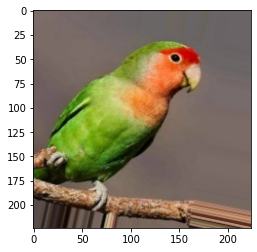

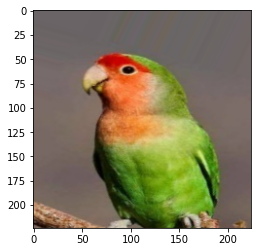

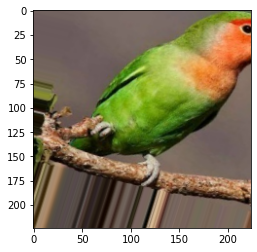

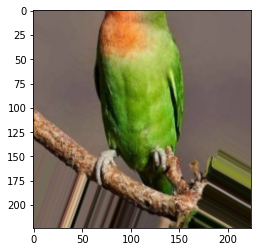

In [0]:
img = image.load_img(os.path.join(train_ROSYFACEDLOVEBIRD_dir, os.listdir(train_ROSYFACEDLOVEBIRD_dir)[1]), target_size=(224,224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0 
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
backend.clear_session()
base_model = Xception (weights = 'imagenet', # using the weights trained on imagenet
                  include_top = False,
                  input_shape = (224, 224, 3))

83689472/83683744 [==============================] - 1s 0us/step


In [0]:
print('Xception Model', base_model.summary())

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [0]:
for layer in base_model.layers[:-3]:
    layer.trainable = False
for layer in base_model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7faef5e1c860> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faef5739e10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7faef57392b0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7faef57b1630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7faef57b1c88> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7faef56ec710> False
<tensorflow.python.keras.layers.core.Activation object at 0x7faef56ecf60> False
<tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7faef569fcc0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7faef564b7f0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7faef564bc50> False
<tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x7faef5652550> False
<tensorflow.pyt

In [0]:
inputs = Input(shape=(224,224,3))

base = base_model (inputs)

conv1 = Conv2D(184, (3,3), padding = 'same', activation='relu')(base)

drop1 = Dropout(0.3)(conv1)

conv2 = Conv2D(184, (3,3), padding = 'same', activation='relu')(drop1)

avgp = AveragePooling2D((3,3), padding = 'same')(conv2)

flat = Flatten()(avgp)

Bn = BatchNormalization()(flat)

hidden = Dense(250, activation='relu')(Bn)

drop2 = Dropout(0.3)(hidden)

output = Dense(180, activation='softmax')(drop2)

model = Model(inputs=inputs, outputs=output)

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

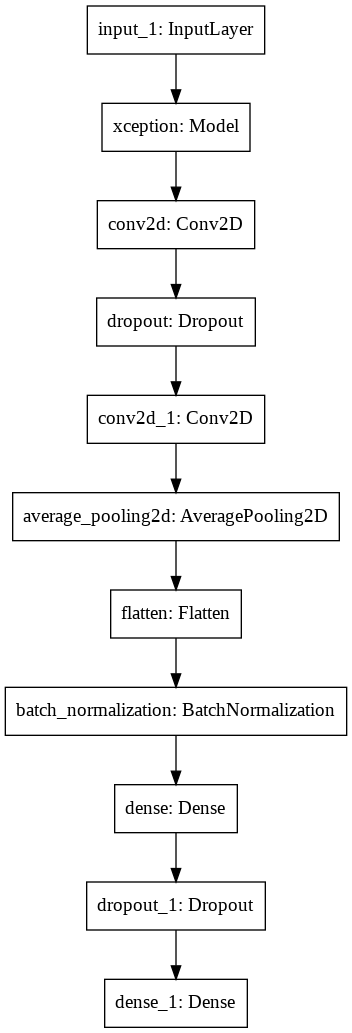

In [0]:
plot_model(model)

In [0]:
print('My Model with Transer Learning', model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 184)         3391672   
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 184)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 184)         304888    
_________________________________________________________________
average_pooling2d (AveragePo (None, 3, 3, 184)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1656)              0     

In [0]:
backend.clear_session()
history = model.fit( 
    train_generator, 
    steps_per_epoch = 100,  
    epochs=5, 
    validation_data = validataion_generator, 
    validation_steps = 30,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

test_loss, test_acc = model.evaluate(test_generator, steps = 30) 
               
print('test_acc:', test_acc)

Epoch 1/5
100/100 [==============================] - 301s 3s/step - loss: 2.6205 - accuracy: 0.5701 - val_loss: 4.1599 - val_accuracy: 0.8889
Epoch 2/5
100/100 [==============================] - 300s 3s/step - loss: 0.6747 - accuracy: 0.8992 - val_loss: 2.7091 - val_accuracy: 0.9400
Epoch 3/5
100/100 [==============================] - 301s 3s/step - loss: 0.4040 - accuracy: 0.9261 - val_loss: 1.0709 - val_accuracy: 0.9333
Epoch 4/5
100/100 [==============================] - 302s 3s/step - loss: 0.3164 - accuracy: 0.9336 - val_loss: 0.3485 - val_accuracy: 0.9500
Epoch 5/5
30/30 [==============================] - 3s 97ms/step - loss: 0.0748 - accuracy: 0.9811
test_acc: 0.9811111092567444


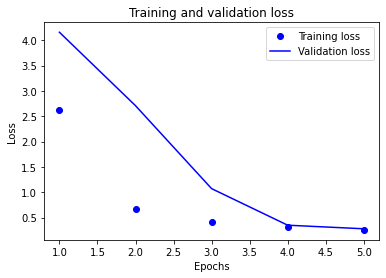

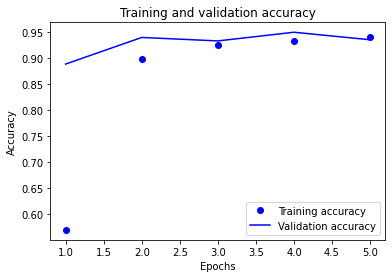

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
